# Ideal gas

Let's briefly introduce the main aspects of the theory combining some Wikipedia articles. Links below.

An ideal gas is a theoretical gas composed of many randomly moving point particles whose only interactions are perfectly elastic collisions. The ideal gas concept is useful because it obeys the ideal gas law, first stated by Émile Clapeyron in 1834 as a combination of Boyle's, Charles's, Avogadro's and Gay-Lussac's empirical laws:

$$
PV = nRT
$$

where $P$, $V$ and $T$ are the pressure, volume and temperature; $n$ is the number of moles of gas; and $R$ is the ideal gas constant.

It is the same for all gases. It can also be derived from the microscopic kinetic theory, as was achieved by August Krönig in 1856 and Rudolf Clausius in 1857.

The theory for ideal gases makes the following assumptions:

- The gas consists of very small particles known as molecules. This smallness of their size is such that the total volume of the individual gas molecules added up is negligible compared to the volume of the smallest open ball containing all the molecules. This is equivalent to stating that the average distance separating the gas particles is large compared to their size.
- These particles have the same mass.
- The number of molecules is so large that statistical treatment can be applied.
- The rapidly moving particles constantly collide among themselves and with the walls of the container. All these collisions are perfectly elastic. This means the molecules are considered to be perfectly spherical in shape and elastic in nature.
- Except during collisions, the interactions among molecules are negligible. (That is, they exert no forces on one another.)

This implies:
   1. Relativistic effects are negligible.
   2. Quantum-mechanical effects are negligible. This means that the inter-particle distance is much larger than the thermal de Broglie wavelength and the molecules are treated as classical objects.
   3. Because of the above two, their dynamics can be treated classically. This means that the equations of motion of the molecules are time-reversible.

- The average kinetic energy of the gas particles depends only on the absolute temperature of the system. The kinetic theory has its own definition of temperature, not identical with the thermodynamic definition.
- The elapsed time of a collision between a molecule and the container's wall is negligible when compared to the time between successive collisions.
- Because they have mass, gravity will accelerate molecules. (If this were not the case then there would be no density gradient in a planet's troposphere and it would collapse to the surface.)

References: [Ideal gases](https://en.wikipedia.org/wiki/Ideal_gas), [Ideal gas law](https://en.wikipedia.org/wiki/Ideal_gas_law), [Kinetic theory of gases](https://en.wikipedia.org/wiki/Kinetic_theory_of_gases)

# About this piece of software

It's a simple script to plot volume *vs* temperature *vs* pressure for an ideal gas.

Usually we see textbooks plotting only 2D relationships (Boyle's, Charles's and Gay-Lussac's empirical laws) so that many students do not think of the ideal gas law as a surface plot. The figure below [from here](http://hyperphysics.phy-astr.gsu.edu/hbase/Kinetic/idegas.html) illustrates the surface and the 2D relationships.

![surface](pvtgas.png)

Here we are going to calculate pressure values from volume and temperature values (arrays). Then the plot will be generated. The python script calculates the pressure assuming the ideal gas law in the following form:

$$
P = nR\frac{T}{V}
$$

By default, the script uses the R constant with SI units, but the user can pass other R values. Also by default, $n = 1$ and this can be changed too.

Please, run the following cell so that the plots can be properly displayed. Then, run each code cell after reading their meaning.

In [1]:
%matplotlib notebook

Now, let's import the script (the notebook must be in the same folder as the script)

In [2]:
import ideal_gases

The following must be imported so that we can use them in the examples.

In [3]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
from matplotlib import animation

Now, let's create two simple arrays for volume (from 1 to 10 $m^3$) and temperature (from 1 to 300 K) with five values each.

In [22]:
vol = np.linspace(1, 10, 5)
temp = np.linspace(1, 300, 5)

Since the plot is a surface, we need to combine these values to generate a 2D grid and then calculate the pressure. The method `grid_points` do this returning volume, temperature and pressure matrices. Run the following cell to see the method documentation.

In [5]:
print(ideal_gases.grid_points.__doc__)

Creates grid points to a 3D plot pressure x volume x temperature.
    The pressure data are calculated with ideal gas formula from volume
    and temperature arrays.

    The R value is taken from SciPy constants by default. So the values are
    considered to be in SI units. The user can change the parameter R to use
    another unit system.

    Parameters
    ----------
    volume_array : array
        volume array
    temperature_array : array
        volume array
    n_mol : int, optional
        number of moles of gas, by default 1
    R : float, optional
        ideal gas constant, by default constants.gas_constant

    Returns
    -------
    tuple
        volume, temperature and pressure matrices
    


So let's get the matrices:

In [23]:
v, t, p = ideal_gases.grid_points(vol, temp)

Confirming that they are matrices (arrays of arrays):

In [24]:
v, t, p

(array([[ 1.  ,  3.25,  5.5 ,  7.75, 10.  ],
        [ 1.  ,  3.25,  5.5 ,  7.75, 10.  ],
        [ 1.  ,  3.25,  5.5 ,  7.75, 10.  ],
        [ 1.  ,  3.25,  5.5 ,  7.75, 10.  ],
        [ 1.  ,  3.25,  5.5 ,  7.75, 10.  ]]),
 array([[  1.  ,   1.  ,   1.  ,   1.  ,   1.  ],
        [ 75.75,  75.75,  75.75,  75.75,  75.75],
        [150.5 , 150.5 , 150.5 , 150.5 , 150.5 ],
        [225.25, 225.25, 225.25, 225.25, 225.25],
        [300.  , 300.  , 300.  , 300.  , 300.  ]]),
 array([[8.31445980e+00, 2.55829532e+00, 1.51171996e+00, 1.07283352e+00,
         8.31445980e-01],
        [6.29820330e+02, 1.93790871e+02, 1.14512787e+02, 8.12671393e+01,
         6.29820330e+01],
        [1.25132620e+03, 3.85023446e+02, 2.27513855e+02, 1.61461445e+02,
         1.25132620e+02],
        [1.87283207e+03, 5.76256022e+02, 3.40514922e+02, 2.41655751e+02,
         1.87283207e+02],
        [2.49433794e+03, 7.67488597e+02, 4.53515989e+02, 3.21850057e+02,
         2.49433794e+02]]))

Let's define the plots axes labels.

In [8]:
labels=['Volume / m3', 'Temperature / K', 'Pressure / Pa']

As a first plot, let's visualize that we actually have grid points as a result with a scatter plot.

<IPython.core.display.Javascript object>


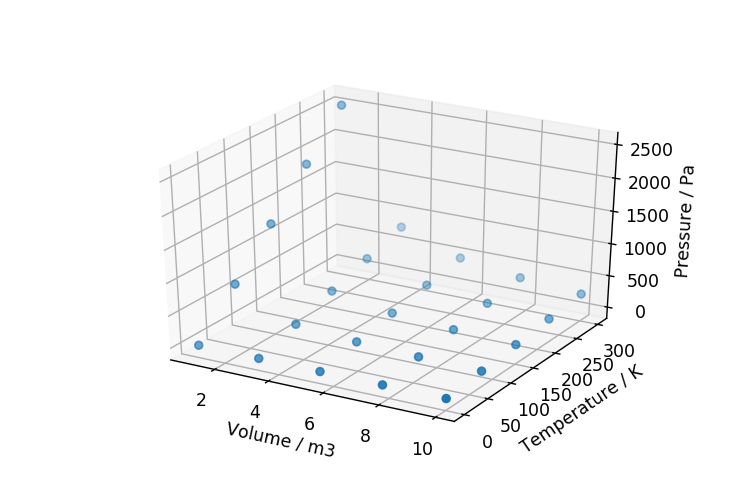

In [25]:
fig1 = plt.figure(figsize=(6,4))
ax = fig1.add_subplot(111, projection='3d')

ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
ax.scatter3D(v, t, p)


So we got a plot with 25 points ($5 \times 5$). As expected, low volumes with high temperatures have higher pressure values.

We can increase the number of points to better visualize a surface. With 900 points ($30 \times 30$):

<IPython.core.display.Javascript object>


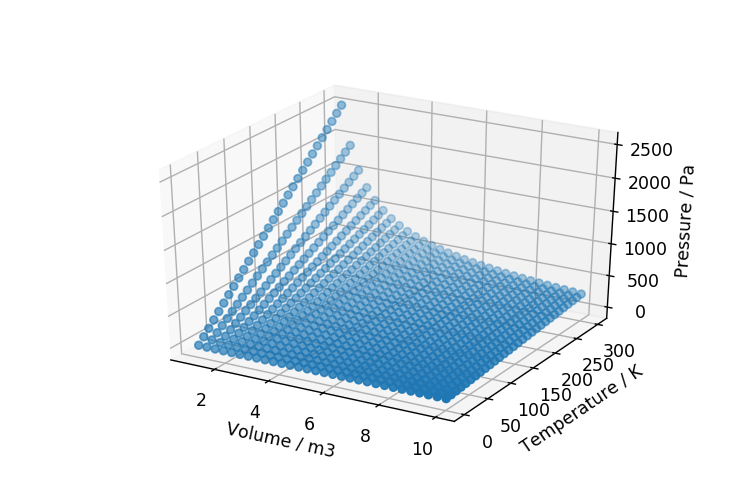

In [26]:
vol = np.linspace(1, 10, 30)
temp = np.linspace(1, 300, 30)
v, t, p = ideal_gases.grid_points(vol, temp)

fig2 = plt.figure(figsize=(6,4))
ax = fig2.add_subplot(111, projection='3d')
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
ax.scatter3D(v, t, p)


It's a surface. But it can be even better visualized using `plot_surface` from `matplotlib` package.

<IPython.core.display.Javascript object>


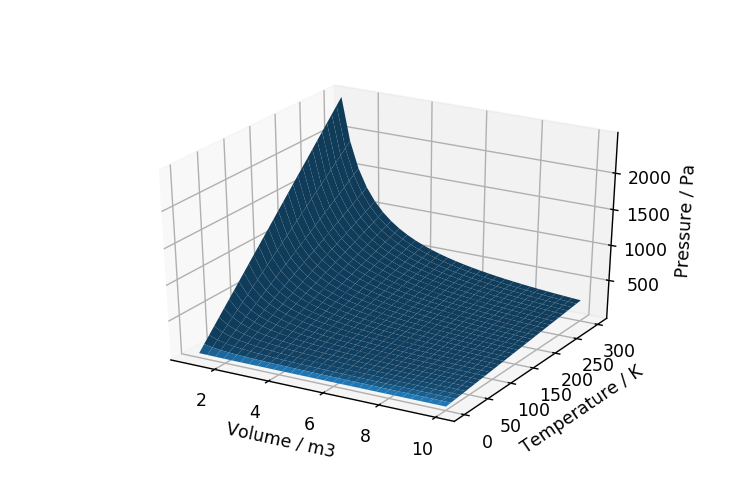

In [27]:
fig3 = plt.figure(figsize=(6,4))
ax = fig3.add_subplot(111, projection='3d')
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
ax.plot_surface(v, t, p)

A great advantage of using the surface method is that we can use [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html). Let's use one that illustrates with hot colors the higher pressure values.

<IPython.core.display.Javascript object>


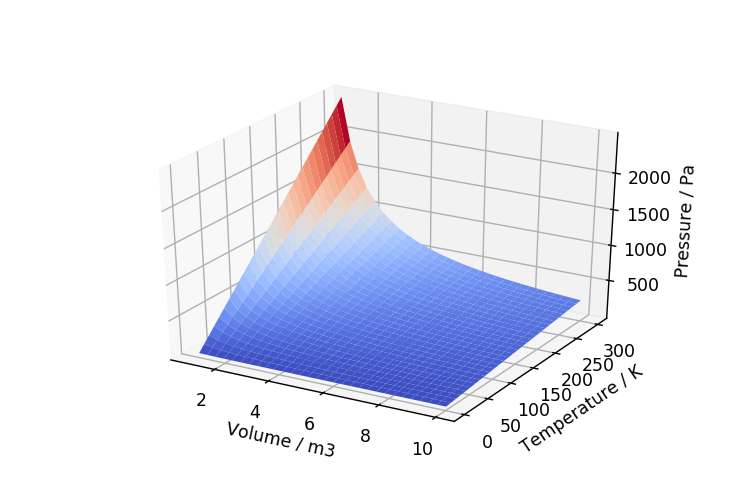

In [28]:
fig4 = plt.figure(figsize=(6,4))
ax = fig4.add_subplot(111, projection='3d')
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
ax.plot_surface(v, t, p, cmap='coolwarm')

Excellent! However, we must be aware that scatter plots and surface plots can be really slow and resources consuming as the number of points increase (for smoother plots). Instead, we can use wire frames. 

Wire frame plots are similar to surface plots, but on a wire frame plot the entire 3D surface is not shown. Instead, the surface is approximated with "wires" laid over the 3D surface. Wire frame 3D surface plots can be constructed using Matplotlib's `plot_wireframe` method. The keyword arguments `rstride` and `cstride` determine the row step size and the column step size. These keyword arguments control how close together the "wires" in the wire frame plot are drawn.

<IPython.core.display.Javascript object>


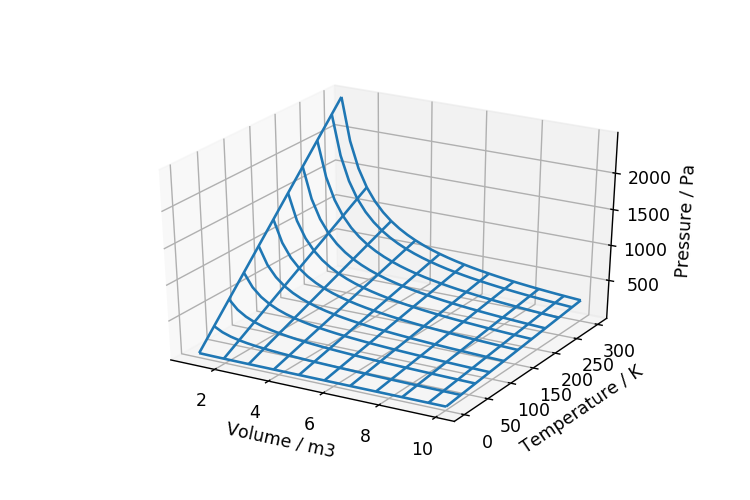

In [29]:
fig5 = plt.figure(figsize=(6,4))
ax = fig5.add_subplot(111, projection='3d')
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
ax.plot_wireframe(v, t, p, rstride=3, cstride=3)

Plotting again with a larger step size:

<IPython.core.display.Javascript object>


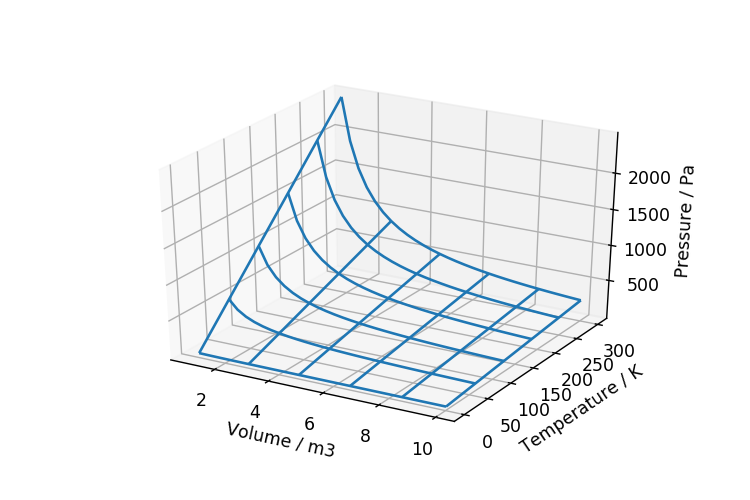

In [30]:
fig6 = plt.figure(figsize=(6,4))
ax = fig6.add_subplot(111, projection='3d')
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
ax.plot_wireframe(v, t, p, rstride=6, cstride=6)

We can the `plot_3d` method from the ideal_gases module to have a quick wire frame plot passing the grid points we already have.

<IPython.core.display.Javascript object>


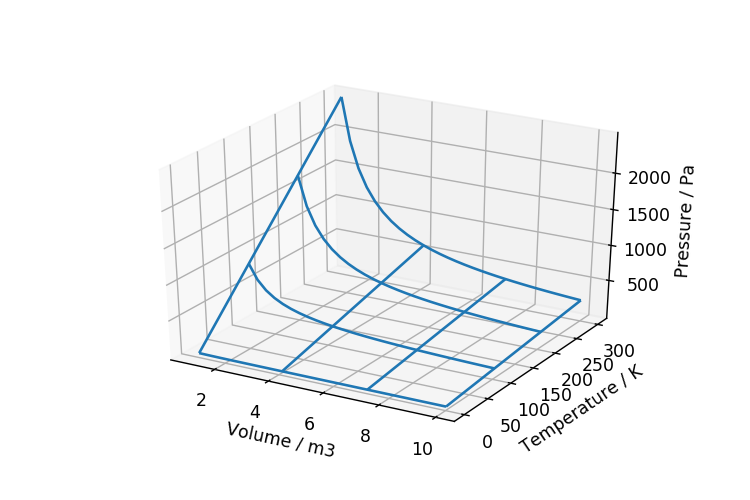

In [31]:
fig7 = plt.figure(figsize=(6,4))
ax = fig7.add_subplot(111, projection='3d')

ideal_gases.plot_3d(v, t, p)

The method gets the current axis an plots in it. That's why we created a figure with an 3D axis before calling the method passing our grid points. The default step is 10, but it can be changed. Let's plot again passing the keyword `step` and assigning to it the value 1.

<IPython.core.display.Javascript object>


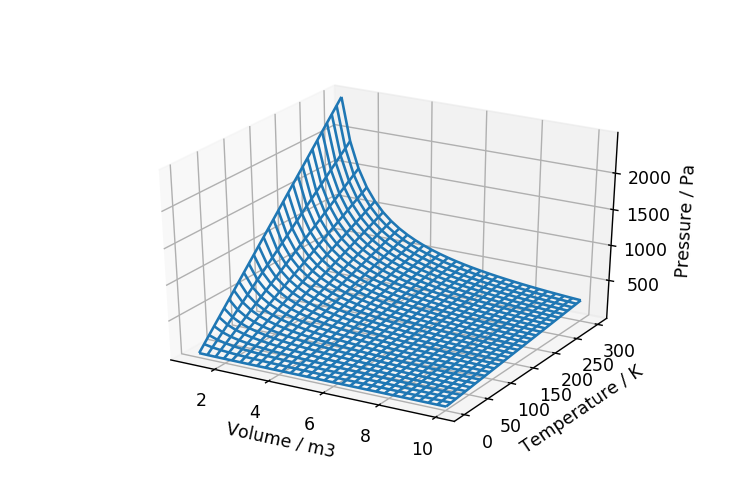

In [32]:
fig8 = plt.figure(figsize=(6,4))
ax = fig8.add_subplot(111, projection='3d')

ideal_gases.plot_3d(v, t, p, step=1)

Since the method plots in the current axis, changes can be made on them before the plotting. In the following example, we change the initial view to a 90° angle (azimuth angle) with 30° elevation.

<IPython.core.display.Javascript object>


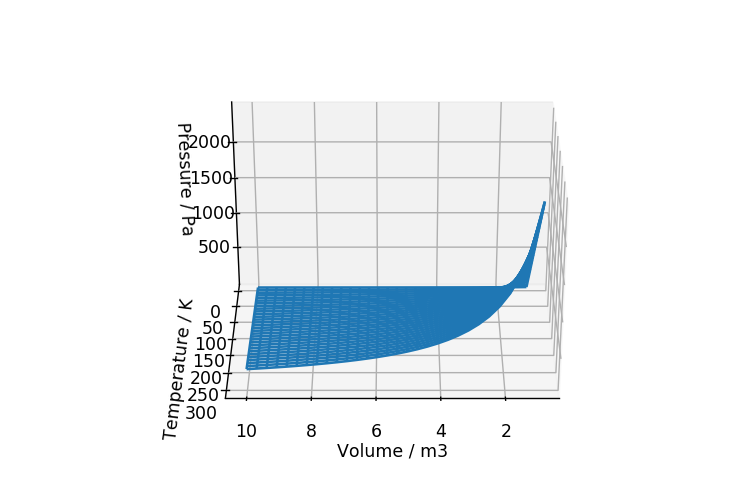

In [33]:
fig9 = plt.figure(figsize=(6,4))
ax = fig9.add_subplot(111, projection='3d')
ax.view_init(30, 90)  # elevation=30° and azimuth angle=90° view
ideal_gases.plot_3d(v, t, p, step=1)

It would be really cool a plot with automatic rotation. So the `ideal_gas` module has a method called `animate` that could be passed to [matplolib's animation method](https://matplotlib.org/3.1.1/api/animation_api.html). See [the docs](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation) to understand all the parameters.

<IPython.core.display.Javascript object>


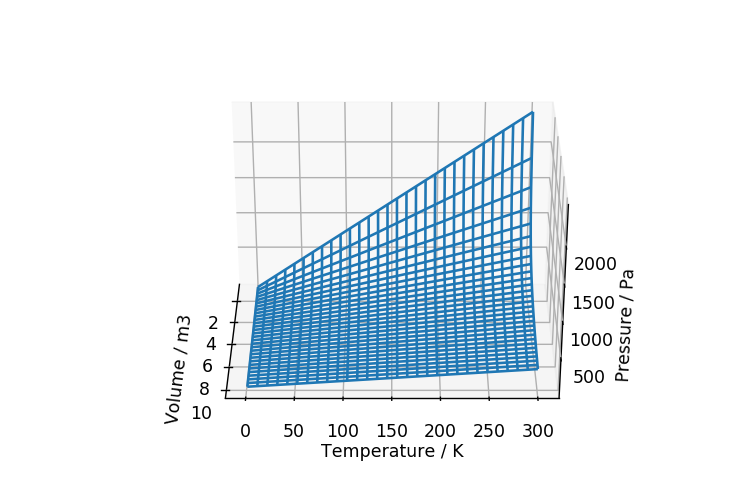

In [34]:
fig10 = plt.figure(figsize=(6,4))
ax = fig10.add_subplot(111, projection='3d')
ideal_gases.plot_3d(v, t, p, step=1)
anim = animation.FuncAnimation(fig10,
                               ideal_gases.animate,
                               frames=361,  # 360° rotation
                               fargs=(30, False),  # set True to save
                               interval=10,
                               repeat=False)

## Customization

As written before, the module uses SI units and 1 mole of gas by default. However, the user can pass another values for $R$ and $n$ and also pass the new axis labels. 

Suppose we want the pressure in atmospheres and the graph for 0.25 mol of an ideal gas. First, let's create another volume and temperature arrays considering an 1 to 25 liter and 1 to 500 K intervals. Each array with 50 points so we will have 2500 grid points.

In [35]:
vol = np.linspace(1, 25, 50)
temp = np.linspace(1, 500, 50)

Since we are using liters and want the pressure in atmosphere let's use an appropriate $R$ value. [From Wikipedia](https://en.wikipedia.org/wiki/Gas_constant) we get 0.082057366080960	L⋅atm/(K⋅mol). So:

In [36]:
v, t, p = ideal_gases.grid_points(vol, temp, n_mol=0.25, R=0.082057366080960)

The plot must have the correct labels, so we can pass a list with the appropriate strings for volume, temperature and pressure respectively.

<IPython.core.display.Javascript object>


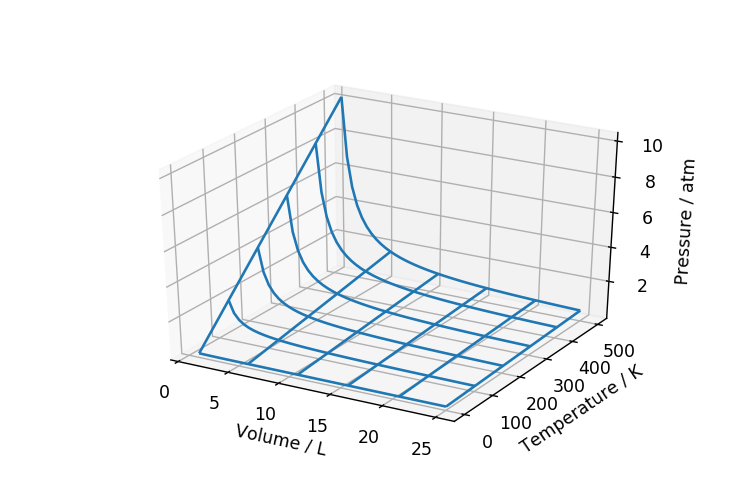

In [37]:
fig11 = plt.figure(figsize=(6,4))
ax = fig11.add_subplot(111, projection='3d')
ideal_gases.plot_3d(v, t, p, labels=['Volume / L', 'Temperature / K', 'Pressure / atm'])